In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\spark-3.2.0-bin-hadoop3.2'

In [2]:
import pyspark

In [3]:
from pyspark import SparkContext
sc=SparkContext("local","Test-app")

In [4]:
import math
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr

# INTEGRANTES


# RED NEURONAL PERCEPTRON

#  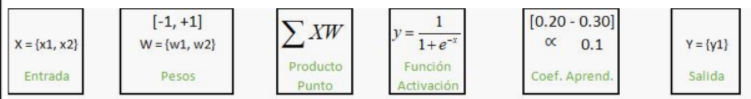

# 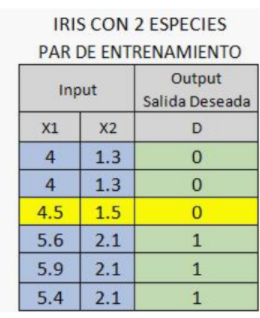

# 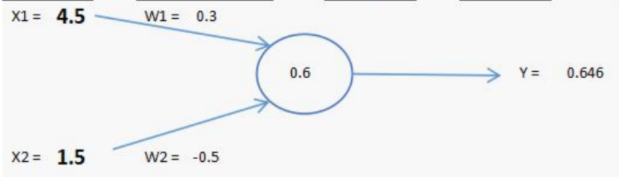

# 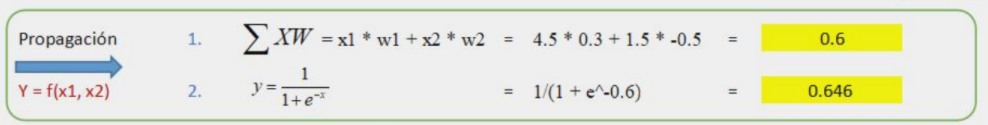

# 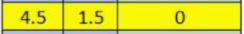

# 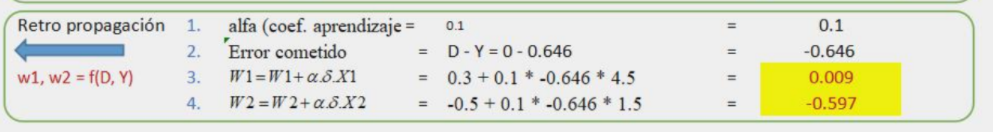

# FUNCION DE PROPAGACION

# 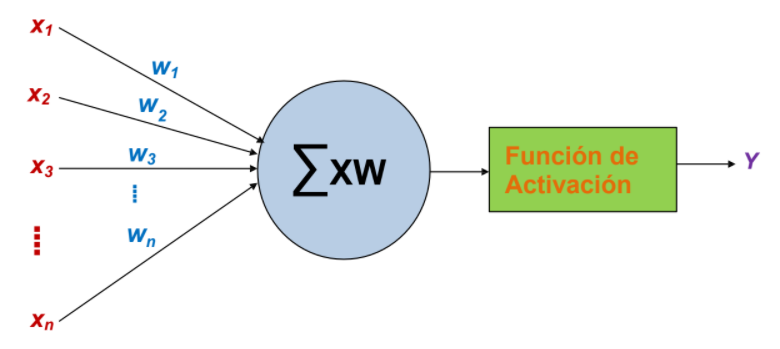

# 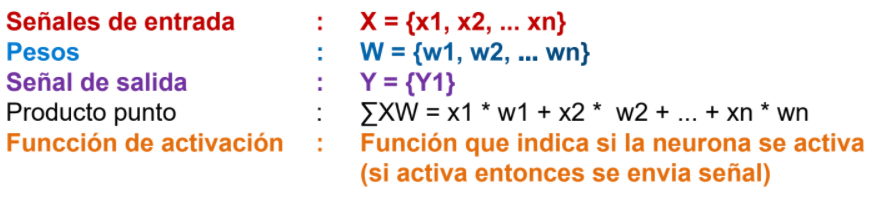

In [117]:
def propagacion(dato,w1,w2,w3,w4):
    xw=dato.flatMap(lambda x: [(x[0]*w1+x[1]*w2+x[2]*w3+x[3]*w4)])
    xw=xw.collect()
    fa=sigmoide(xw[0])
    return fa


# FUNCION DE ACTIVACION

# 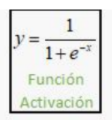

In [103]:
#Su propósito es escalar la salida en el rango (0, 1) o rango (-1,+1)
def sigmoide(x):
    return (1/(1+math.e**(-x)))


# FUNCION DE RETROPROPAGACION

# 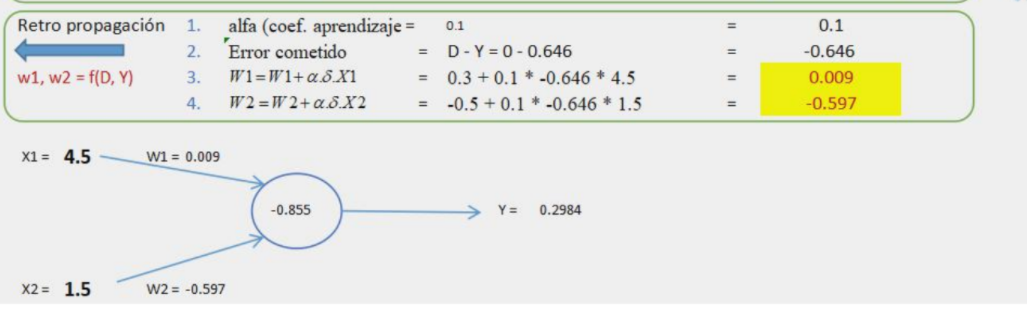

In [95]:
#Metodo de Retropropagacion eficiente
def retropropagacion(dato,coef_apren,prop,w1,w2,w3,w4):
    w=[w1,w2,w3,w4]
    wr=dato.flatMap(lambda x:[(i+coef_apren*(x[4]-prop)*x[w.index(i)]) for i in w])
    wr_aux=wr.collect()
    return wr_aux[0],wr_aux[1],wr_aux[2],wr_aux[3]


In [96]:
#Metodo de Retropropagacion no-eficiente
#Este metodo de retropropagacion tiene la misma logica que la de arriba, solo que es mas detallado, aunque no eficiente
def retropropagacion_aux(dato,coef_apren,prop,w1,w2,w3,w4):
    wa=dato.flatMap(lambda x:[(w1+coef_apren*(x[4]-prop)*x[0])])
    wb=dato.flatMap(lambda x:[(w2+coef_apren*(x[4]-prop)*x[1])])
    wc=dato.flatMap(lambda x:[(w3+coef_apren*(x[4]-prop)*x[2])])
    wd=dato.flatMap(lambda x:[(w4+coef_apren*(x[4]-prop)*x[3])])
    w1=wa.collect()
    w2=wb.collect()
    w3=wc.collect()
    w4=wd.collect()
    # umbral=umbral-coef_apren*(dato.collect()[0][4]-prop)
    return w1[0],w2[0],w3[0],w4[0]


# FUNCION ENTRENAMIENTO

In [101]:
#Este es el entrenamiento iterativo , no eficiente
def entrenamiento(Datos,Epocas,coeficiente_aprendizaje,w1,w2,w3,w4):
    for i in Epocas:
        for j in Datos:
            dato=sc.parallelize(j)
            prop=propagacion(dato,w1,w2,w3,w4) 
            print(w1,w2,w3,w4)
            w1,w2,w3,w4=retropropagacion(dato,coeficiente_aprendizaje,prop,w1,w2,w3,w4)           
    return w1,w2,w3,w4

In [119]:
#Este es el modulo de entrenamiento mejorado
def entrenamiento_mejorado(dato,Epoc,coef,w1,w2,w3,w4):
    Sa=dato.map(lambda x:[retropropagacion(x,coef,propagacion(x,w1,w2,w3,w4),w1,w2,w3,w4) for i in Epoc])
    return Sa

#  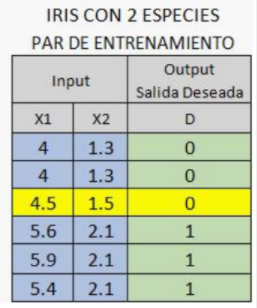

# CARGAR DATA

In [109]:
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StringIndexer

In [105]:
spark = SparkSession.builder.appName('pyspark-ml').getOrCreate()

In [106]:
iris= spark.read.csv('Iris.csv', header=True, inferSchema=True)
iris.show(40)

+---+-------------+------------+-------------+------------+---------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|        Species|
+---+-------------+------------+-------------+------------+---------------+
|  1|          5.1|         3.5|          1.4|         0.2|    Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|    Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|    Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|    Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|    Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|    Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|    Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|    Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|    Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|    Iris-setosa|
| 11|       

# TIPOS DE DATOS

In [107]:
iris.printSchema()


root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



# NORMALIZACION BINARIA

In [110]:
#Si la columna de entrada es string, la convertimos en numero. Los índices están en [0, numLabels). 
indexer = StringIndexer(inputCol = 'Species', outputCol = 'Train_Test')
data_iris= indexer.fit(iris).transform(iris)
data_iris.show(40)

+---+-------------+------------+-------------+------------+---------------+----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|        Species|Train_Test|
+---+-------------+------------+-------------+------------+---------------+----------+
|  1|          5.1|         3.5|          1.4|         0.2|    Iris-setosa|       1.0|
|  2|          4.9|         3.0|          1.4|         0.2|    Iris-setosa|       1.0|
|  3|          4.7|         3.2|          1.3|         0.2|    Iris-setosa|       1.0|
|  4|          4.6|         3.1|          1.5|         0.2|    Iris-setosa|       1.0|
|  5|          5.0|         3.6|          1.4|         0.2|    Iris-setosa|       1.0|
|  6|          5.4|         3.9|          1.7|         0.4|    Iris-setosa|       1.0|
|  7|          4.6|         3.4|          1.4|         0.3|    Iris-setosa|       1.0|
|  8|          5.0|         3.4|          1.5|         0.2|    Iris-setosa|       1.0|
|  9|          4.4|         2.9|          1

# CANTIDAD DE DATOS

In [111]:
data_iris.select('Species','Train_Test').groupBy('Species','Train_Test').count().show()

+---------------+----------+-----+
|        Species|Train_Test|count|
+---------------+----------+-----+
|    Iris-setosa|       1.0|   19|
|Iris-versicolor|       0.0|   20|
+---------------+----------+-----+



# COMBINAR DATOS EN UNA SOLA COLUMNA

In [112]:
#Un transformador de características que fusiona varias columnas en una columna vectorial.
vectorAssembler = VectorAssembler(inputCols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Train_Test'], outputCol = 'features')
norm_iris = vectorAssembler.transform(data_iris)
norm_iris.show(40)

+---+-------------+------------+-------------+------------+---------------+----------+--------------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|        Species|Train_Test|            features|
+---+-------------+------------+-------------+------------+---------------+----------+--------------------+
|  1|          5.1|         3.5|          1.4|         0.2|    Iris-setosa|       1.0|[5.1,3.5,1.4,0.2,...|
|  2|          4.9|         3.0|          1.4|         0.2|    Iris-setosa|       1.0|[4.9,3.0,1.4,0.2,...|
|  3|          4.7|         3.2|          1.3|         0.2|    Iris-setosa|       1.0|[4.7,3.2,1.3,0.2,...|
|  4|          4.6|         3.1|          1.5|         0.2|    Iris-setosa|       1.0|[4.6,3.1,1.5,0.2,...|
|  5|          5.0|         3.6|          1.4|         0.2|    Iris-setosa|       1.0|[5.0,3.6,1.4,0.2,...|
|  6|          5.4|         3.9|          1.7|         0.4|    Iris-setosa|       1.0|[5.4,3.9,1.7,0.4,...|
|  7|          4.6|         

# GENERAR RDD

In [113]:
import numpy as np
iris_data= np.array(norm_iris.select("features").collect())
aux=iris_data.tolist()
rdd=sc.parallelize(aux)
print(rdd.collect())

[[[5.1, 3.5, 1.4, 0.2, 1.0]], [[4.9, 3.0, 1.4, 0.2, 1.0]], [[4.7, 3.2, 1.3, 0.2, 1.0]], [[4.6, 3.1, 1.5, 0.2, 1.0]], [[5.0, 3.6, 1.4, 0.2, 1.0]], [[5.4, 3.9, 1.7, 0.4, 1.0]], [[4.6, 3.4, 1.4, 0.3, 1.0]], [[5.0, 3.4, 1.5, 0.2, 1.0]], [[4.4, 2.9, 1.4, 0.2, 1.0]], [[4.9, 3.1, 1.5, 0.1, 1.0]], [[5.4, 3.7, 1.5, 0.2, 1.0]], [[4.8, 3.4, 1.6, 0.2, 1.0]], [[4.8, 3.0, 1.4, 0.1, 1.0]], [[4.3, 3.0, 1.1, 0.1, 1.0]], [[5.8, 4.0, 1.2, 0.2, 1.0]], [[5.7, 4.4, 1.5, 0.4, 1.0]], [[5.4, 3.9, 1.3, 0.4, 1.0]], [[5.1, 3.5, 1.4, 0.3, 1.0]], [[5.7, 3.8, 1.7, 0.3, 1.0]], [[7.0, 3.2, 4.7, 1.4, 0.0]], [[6.4, 3.2, 4.5, 1.5, 0.0]], [[6.9, 3.1, 4.9, 1.5, 0.0]], [[5.5, 2.3, 4.0, 1.3, 0.0]], [[6.5, 2.8, 4.6, 1.5, 0.0]], [[5.7, 2.8, 4.5, 1.3, 0.0]], [[6.3, 3.3, 4.7, 1.6, 0.0]], [[4.9, 2.4, 3.3, 1.0, 0.0]], [[6.6, 2.9, 4.6, 1.3, 0.0]], [[5.2, 2.7, 3.9, 1.4, 0.0]], [[5.0, 2.0, 3.5, 1.0, 0.0]], [[5.9, 3.0, 4.2, 1.5, 0.0]], [[6.0, 2.2, 4.0, 1.0, 0.0]], [[6.1, 2.9, 4.7, 1.4, 0.0]], [[5.6, 2.9, 3.6, 1.3, 0.0]], [[6.7, 3.1, 4

# PRUEBAS - ENTRENAMIENTO

In [64]:
#Datos de Entrenamiento
Train =[[[5.1,3.5,1.4,0.2,0]],[[5.8,4.0,1.2,0.2,0]],[[7.0,3.2,4.7,1.4,1]],[[5.2,2.7,3.9,1.4,1]]]
datos=sc.parallelize(Train)
#Definimos nuestras pesos iniciales
w1=-0.1
w2=0.1
w3=-0.2
w4=0.25
umbral=0.8
Epocas=10
#Diez epocas para un mejor entrenamiento
Epocas_aux=[1,1,1,1,1,1,1,1,1,1,1]

coeficiente_aprendizaje=0.25
Salida=entrenamiento2(datos.collect(),Epocas,coeficiente_aprendizaje,w1,w2,w3,w4,Train)
print(Salida.collect())

-0.1 0.1 -0.2 0.25
-0.6147395583965954 -0.2532526381153106 -0.34130105524612425 0.22981413496483938
-0.6250185912022542 -0.26034162625714424 -0.34342775168867434 0.2294596855577477
1.1223571980668567 0.5384587345515923 0.8298102782491574 0.5789348434115699
1.1223727005159618 0.5384667839001661 0.8298219050859862 0.5789390171478673
-0.15245102444708225 -0.3364122430352563 0.4798702943118172 0.5289459298944146
-0.40669672057756845 -0.5117541024355916 0.4272677364917166 0.5201788369243978
1.0837969202011544 0.16961441906325314 1.4280277524431448 0.8182775650801424
1.0838004784635804 0.1696162666225897 1.4280304211399644 0.8182785230738724
-0.19087761328866226 -0.705162815952479 1.078118788109937 0.7682911469267256
-0.30288709319813806 -0.7824107331314278 1.0549444129562524 0.7644287510677782
0.04203900488530976 -0.6247302311504231 1.2865376502408532 0.8334139706844678
0.05357072850391246 -0.6187426054253794 1.2951864429548052 0.8365186655048608
-0.6120172864412788 -1.0755186941132557 1.11

In [21]:
print(rdd.collect())

[[[5.1, 3.5, 1.4, 0.2, 1.0]], [[4.9, 3.0, 1.4, 0.2, 1.0]], [[4.7, 3.2, 1.3, 0.2, 1.0]], [[4.6, 3.1, 1.5, 0.2, 1.0]], [[5.0, 3.6, 1.4, 0.2, 1.0]], [[5.4, 3.9, 1.7, 0.4, 1.0]], [[4.6, 3.4, 1.4, 0.3, 1.0]], [[5.0, 3.4, 1.5, 0.2, 1.0]], [[4.4, 2.9, 1.4, 0.2, 1.0]], [[4.9, 3.1, 1.5, 0.1, 1.0]], [[5.4, 3.7, 1.5, 0.2, 1.0]], [[4.8, 3.4, 1.6, 0.2, 1.0]], [[4.8, 3.0, 1.4, 0.1, 1.0]], [[4.3, 3.0, 1.1, 0.1, 1.0]], [[5.8, 4.0, 1.2, 0.2, 1.0]], [[5.7, 4.4, 1.5, 0.4, 1.0]], [[5.4, 3.9, 1.3, 0.4, 1.0]], [[5.1, 3.5, 1.4, 0.3, 1.0]], [[5.7, 3.8, 1.7, 0.3, 1.0]], [[7.0, 3.2, 4.7, 1.4, 0.0]], [[6.4, 3.2, 4.5, 1.5, 0.0]], [[6.9, 3.1, 4.9, 1.5, 0.0]], [[5.5, 2.3, 4.0, 1.3, 0.0]], [[6.5, 2.8, 4.6, 1.5, 0.0]], [[5.7, 2.8, 4.5, 1.3, 0.0]], [[6.3, 3.3, 4.7, 1.6, 0.0]], [[4.9, 2.4, 3.3, 1.0, 0.0]], [[6.6, 2.9, 4.6, 1.3, 0.0]], [[5.2, 2.7, 3.9, 1.4, 0.0]], [[5.0, 2.0, 3.5, 1.0, 0.0]], [[5.9, 3.0, 4.2, 1.5, 0.0]], [[6.0, 2.2, 4.0, 1.0, 0.0]], [[6.1, 2.9, 4.7, 1.4, 0.0]], [[5.6, 2.9, 3.6, 1.3, 0.0]], [[6.7, 3.1, 4

# PREDICCIONES

In [120]:
Test=rdd
print( "          TEST         ", "             Prediccion       ","       Species- Salida  ")
for i in Test.collect():
    aux=sc.parallelize(i)
    x=propagacion(aux,-0.31238755849623756, -1.3148745396464514, 1.9968036300441268, 1.1508266991045357)
    if(x<0.5):
        print(i," => " ,x ,"      Iris-setosa")
    else:
        print(i," => " ,x ,"       Iris-Versicolor")


          TEST                       Prediccion               Species- Salida  
[[5.1, 3.5, 1.4, 0.2, 1.0]]  =>  0.040327943008868584       Iris-setosa
[[4.9, 3.0, 1.4, 0.2, 1.0]]  =>  0.07946544738312641       Iris-setosa
[[4.7, 3.2, 1.3, 0.2, 1.0]]  =>  0.05469113975431278       Iris-setosa
[[4.6, 3.1, 1.5, 0.2, 1.0]]  =>  0.09214484890670102       Iris-setosa
[[5.0, 3.6, 1.4, 0.2, 1.0]]  =>  0.03662203500213437       Iris-setosa
[[5.4, 3.9, 1.7, 0.4, 1.0]]  =>  0.0492656936798413       Iris-setosa
[[4.6, 3.4, 1.4, 0.3, 1.0]]  =>  0.05914577172856062       Iris-setosa
[[5.0, 3.4, 1.5, 0.2, 1.0]]  =>  0.05693953729237911       Iris-setosa
[[4.4, 2.9, 1.4, 0.2, 1.0]]  =>  0.10321971645299766       Iris-setosa
[[4.9, 3.1, 1.5, 0.1, 1.0]]  =>  0.07610236109067407       Iris-setosa
[[5.4, 3.7, 1.5, 0.2, 1.0]]  =>  0.03467125254168261       Iris-setosa
[[4.8, 3.4, 1.6, 0.2, 1.0]]  =>  0.0727642849074713       Iris-setosa
[[4.8, 3.0, 1.4, 0.1, 1.0]]  =>  0.07354444558766846       Iris-setos